# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
# Import all the necessary libraries/modules
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Let's create some empty lists.

# An empty list for the reviews
reviews = []

# An empty list for the country of the reviewer
country = []

# An empty list to collect the date
date = []

In [4]:
# Get the reviews of customers from the first 100 pages
for i in range(1,100):

    response = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/")
    
    parsed_content = BeautifulSoup(response.content, "lxml")
    
    # Reviews
    for item in parsed_content.find_all("div", class_="text_content"):
        reviews.append(item.text)
        
    # Country 
    for item in parsed_content.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))
    
    # Date
    for item in parsed_content.find_all("time"):
        date.append(item.text)

In [5]:
# Let's check their lengths.
print(len(reviews))
print(len(country))
print(len(date))

1790
1790
1790


In [6]:
df = pd.DataFrame({"Reviews": reviews,
                  "Country": country,
                  "Date": date})

In [7]:
df

,Reviews,Country,Date
0,✅ Trip Verified | This is a route I fly regula...,United Kingdom,26th June 2024
1,✅ Trip Verified | While BA may have made some...,Canada,23rd June 2024
2,✅ Trip Verified | British Airways new Club Sui...,Canada,23rd June 2024
3,"✅ Trip Verified | Four very pleasant, on time...",United Kingdom,18th June 2024
4,Not Verified | We travel extensively over 25...,United Kingdom,18th June 2024
...,...,...,...
1785,✅ Trip Verified | My boyfriend and I wanted t...,United States,4th June 2019
1786,✅ Trip Verified | I had kept my laptop bag in...,India,2nd June 2019
1787,✅ Trip Verified | London to Delhi. A truly fi...,United Kingdom,2nd June 2019
1788,✅ Trip Verified | London Heathrow to Dubai. L...,United Kingdom,1st June 2019


In [8]:
# Let's save this dataset in the form of a csv file 
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 990 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [9]:
# let's load the csv file after saving it successfully
df = pd.read_csv("BA_reviews.csv")
df

,Unnamed: 0,Reviews,Country,Date
0,0,✅ Trip Verified | This is a route I fly regula...,United Kingdom,26th June 2024
1,1,✅ Trip Verified | While BA may have made some...,Canada,23rd June 2024
2,2,✅ Trip Verified | British Airways new Club Sui...,Canada,23rd June 2024
3,3,"✅ Trip Verified | Four very pleasant, on time...",United Kingdom,18th June 2024
4,4,Not Verified | We travel extensively over 25...,United Kingdom,18th June 2024
...,...,...,...,...
1785,1785,✅ Trip Verified | My boyfriend and I wanted t...,United States,4th June 2019
1786,1786,✅ Trip Verified | I had kept my laptop bag in...,India,2nd June 2019
1787,1787,✅ Trip Verified | London to Delhi. A truly fi...,United Kingdom,2nd June 2019
1788,1788,✅ Trip Verified | London Heathrow to Dubai. L...,United Kingdom,1st June 2019


**Removing the "✅ Trip Verified"**

In [10]:
df["Reviews"]= df["Reviews"].str.replace("✅ Trip Verified |", "")

In [11]:
# Checking after removing the "✅ Trip Verified"
df

,Unnamed: 0,Reviews,Country,Date
0,0,This is a route I fly regularly. Used first c...,United Kingdom,26th June 2024
1,1,While BA may have made some positive improve...,Canada,23rd June 2024
2,2,British Airways new Club Suite is a marked im...,Canada,23rd June 2024
3,3,"Four very pleasant, on time flights with fri...",United Kingdom,18th June 2024
4,4,Not Verified | We travel extensively over 25...,United Kingdom,18th June 2024
...,...,...,...,...
1785,1785,My boyfriend and I wanted to return from our...,United States,4th June 2019
1786,1786,I had kept my laptop bag in the overhead cab...,India,2nd June 2019
1787,1787,London to Delhi. A truly first class experie...,United Kingdom,2nd June 2019
1788,1788,London Heathrow to Dubai. Last Sunday we unf...,United Kingdom,1st June 2019


**You can see that the "✅ Trip verified" ain't anymore**

## Let's explore our data set now

In [12]:
# Get the first five rows
df.head()

,Unnamed: 0,Reviews,Country,Date
0,0,This is a route I fly regularly. Used first c...,United Kingdom,26th June 2024
1,1,While BA may have made some positive improve...,Canada,23rd June 2024
2,2,British Airways new Club Suite is a marked im...,Canada,23rd June 2024
3,3,"Four very pleasant, on time flights with fri...",United Kingdom,18th June 2024
4,4,Not Verified | We travel extensively over 25...,United Kingdom,18th June 2024


In [13]:
# Get the last five rows
df.tail()

,Unnamed: 0,Reviews,Country,Date
1785,1785,My boyfriend and I wanted to return from our...,United States,4th June 2019
1786,1786,I had kept my laptop bag in the overhead cab...,India,2nd June 2019
1787,1787,London to Delhi. A truly first class experie...,United Kingdom,2nd June 2019
1788,1788,London Heathrow to Dubai. Last Sunday we unf...,United Kingdom,1st June 2019
1789,1789,Not Verified | London to Seattle. My husband ...,United Kingdom,30th May 2019


In [14]:
# Get the shape 
df.shape

(1790, 4)

In [15]:
# Get the size
df.size

7160

In [16]:
# Get the basic info about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1790 non-null   int64 
 1   Reviews     1790 non-null   object
 2   Country     1790 non-null   object
 3   Date        1790 non-null   object
dtypes: int64(1), object(3)
memory usage: 56.1+ KB


In [17]:
# Are there any duplicate values
df.duplicated().sum()

0

In [18]:
# Are there any NaN(null) values
df.isnull().sum()

Unnamed: 0    0
Reviews       0
Country       0
Date          0
dtype: int64

In [19]:
df.columns

Index(['Unnamed: 0', 'Reviews', 'Country', 'Date'], dtype='object')

In [20]:
df.dtypes

Unnamed: 0     int64
Reviews       object
Country       object
Date          object
dtype: object

**I guess this much data exploration is more than enough :)**

In [21]:
# Removing the punctuations
df["Reviews"] = df["Reviews"].str.replace("[^\W\S]", "")
df

,Unnamed: 0,Reviews,Country,Date
0,0,This is a route I fly regularly. Used first c...,United Kingdom,26th June 2024
1,1,While BA may have made some positive improve...,Canada,23rd June 2024
2,2,British Airways new Club Suite is a marked im...,Canada,23rd June 2024
3,3,"Four very pleasant, on time flights with fri...",United Kingdom,18th June 2024
4,4,Not Verified | We travel extensively over 25...,United Kingdom,18th June 2024
...,...,...,...,...
1785,1785,My boyfriend and I wanted to return from our...,United States,4th June 2019
1786,1786,I had kept my laptop bag in the overhead cab...,India,2nd June 2019
1787,1787,London to Delhi. A truly first class experie...,United Kingdom,2nd June 2019
1788,1788,London Heathrow to Dubai. Last Sunday we unf...,United Kingdom,1st June 2019


## Let's start the hard part = tokenization

In [22]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          
            
    return newlist 

df['POS tagged'] = df['Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Unnamed: 0,Reviews,Country,Date,POS tagged
0,0,This is a route I fly regularly. Used first c...,United Kingdom,26th June 2024,"[(route, n), (fly, v), (regularly, r), (., Non..."
1,1,While BA may have made some positive improve...,Canada,23rd June 2024,"[(BA, n), (may, None), (made, v), (positive, a..."
2,2,British Airways new Club Suite is a marked im...,Canada,23rd June 2024,"[(British, a), (Airways, n), (new, a), (Club, ..."
3,3,"Four very pleasant, on time flights with fri...",United Kingdom,18th June 2024,"[(Four, None), (pleasant, a), (,, None), (time..."
4,4,Not Verified | We travel extensively over 25...,United Kingdom,18th June 2024,"[(Verified, n), (|, None), (travel, v), (exten..."


In [24]:
# Obtaining the stem words - Lemmatization(An another technique used to reduce inflected words to their root word)

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Write the function that will proceed it all
def lemmatize(pos_data):
    lemma_rew = " "
    
    for word, pos in pos_data:
        if not pos:
            lemma = word 
            lemma_rew = lemma_rew+ " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
        return lemma_rew

df["Lemma"] = df["POS tagged"].apply(lemmatize)
df.head()

,Unnamed: 0,Reviews,Country,Date,POS tagged,Lemma
0,0,This is a route I fly regularly. Used first c...,United Kingdom,26th June 2024,"[(route, n), (fly, v), (regularly, r), (., Non...",route
1,1,While BA may have made some positive improve...,Canada,23rd June 2024,"[(BA, n), (may, None), (made, v), (positive, a...",BA
2,2,British Airways new Club Suite is a marked im...,Canada,23rd June 2024,"[(British, a), (Airways, n), (new, a), (Club, ...",British
3,3,"Four very pleasant, on time flights with fri...",United Kingdom,18th June 2024,"[(Four, None), (pleasant, a), (,, None), (time...",Four
4,4,Not Verified | We travel extensively over 25...,United Kingdom,18th June 2024,"[(Verified, n), (|, None), (travel, v), (exten...",Verified


## Let's perform the Sentiment Analysis using VADER
VADER, the Valence Aware Dictionary and Sentiment Reasoner, is a widely used tool for sentiment analysis.

In [25]:
# First install it
!pip install vaderSentiment

**Cool, the requirement is already satisfied. Let's start the challenging work...**

In [26]:
# First we'll import the SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Let's write the function which will calculate the vader sentiment
def vadersentimentanalysis(review):
    vader_sentiment = analyzer.polarity_scores(review)
    return vader_sentiment["compound"]

df["Sentiment"] = df["Lemma"].apply(vadersentimentanalysis)

# Function which will perform the analyzation
def vader_analysis(compound):
    if compound >= 0.5:
        return "Positive"
    elif compound < 0:
        return "Negative"
    else:
        return "Neutral"

df["Analysis"] = df["Sentiment"].apply(vader_analysis)
df

,Unnamed: 0,Reviews,Country,Date,POS tagged,Lemma,Sentiment,Analysis
0,0,This is a route I fly regularly. Used first c...,United Kingdom,26th June 2024,"[(route, n), (fly, v), (regularly, r), (., Non...",route,0.0,Neutral
1,1,While BA may have made some positive improve...,Canada,23rd June 2024,"[(BA, n), (may, None), (made, v), (positive, a...",BA,0.0,Neutral
2,2,British Airways new Club Suite is a marked im...,Canada,23rd June 2024,"[(British, a), (Airways, n), (new, a), (Club, ...",British,0.0,Neutral
3,3,"Four very pleasant, on time flights with fri...",United Kingdom,18th June 2024,"[(Four, None), (pleasant, a), (,, None), (time...",Four,0.0,Neutral
4,4,Not Verified | We travel extensively over 25...,United Kingdom,18th June 2024,"[(Verified, n), (|, None), (travel, v), (exten...",Verified,0.0,Neutral
...,...,...,...,...,...,...,...,...
1785,1785,My boyfriend and I wanted to return from our...,United States,4th June 2019,"[(boyfriend, n), (wanted, v), (return, v), (tr...",boyfriend,0.0,Neutral
1786,1786,I had kept my laptop bag in the overhead cab...,India,2nd June 2019,"[(kept, v), (laptop, a), (bag, n), (overhead, ...",keep,0.0,Neutral
1787,1787,London to Delhi. A truly first class experie...,United Kingdom,2nd June 2019,"[(London, n), (Delhi, n), (., None), (truly, r...",London,0.0,Neutral
1788,1788,London Heathrow to Dubai. Last Sunday we unf...,United Kingdom,1st June 2019,"[(London, n), (Heathrow, n), (Dubai, n), (., N...",London,0.0,Neutral


In [27]:
vader_counts = df["Analysis"].value_counts()
vader_counts

Analysis
Neutral     1647
Negative     107
Positive      36
Name: count, dtype: int64

## Let's bring the data into life by visualizing it.

([<matplotlib.patches.Wedge at 0x2114f337ed0>,
 [Text(-1.0655374213528566, 0.2731849258226104, 'Neutral'),
  Text(1.0461621345079046, -0.3399187966586506, 'Negative'),
  Text(1.3473062376637224, -0.08524026016165029, 'Positive')],
 [Text(-0.5812022298288309, 0.14900995953960566, '92.0%'),
  Text(0.5706338915497661, -0.1854102527229003, '6.0%'),
  Text(0.8483039274178991, -0.05366979343511314, '2.0%')])

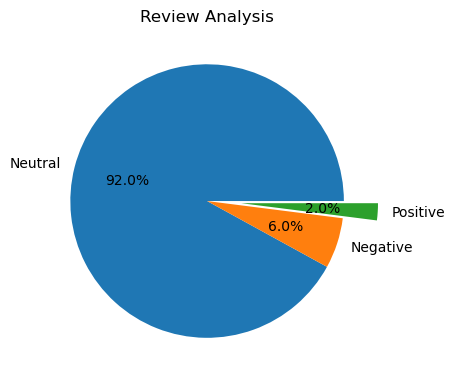

In [28]:
plt.figure(figsize=(15,8))

plt.subplot(1,3,2)
plt.title("Review Analysis")

plt.pie(vader_counts.values, labels=vader_counts.index, explode=(0, 0, 0.25), autopct="%1.1f%%", shadow=False)

In [29]:
# Let's save it, otherwise we'll forget it afterwards
df.to_csv("BA_reviews.csv")

## Let's start something unique(specifically for me) called Wordcloud

A word cloud is a visual representation (image) of word data

In [30]:
# First install it 
!pip install wordcloud

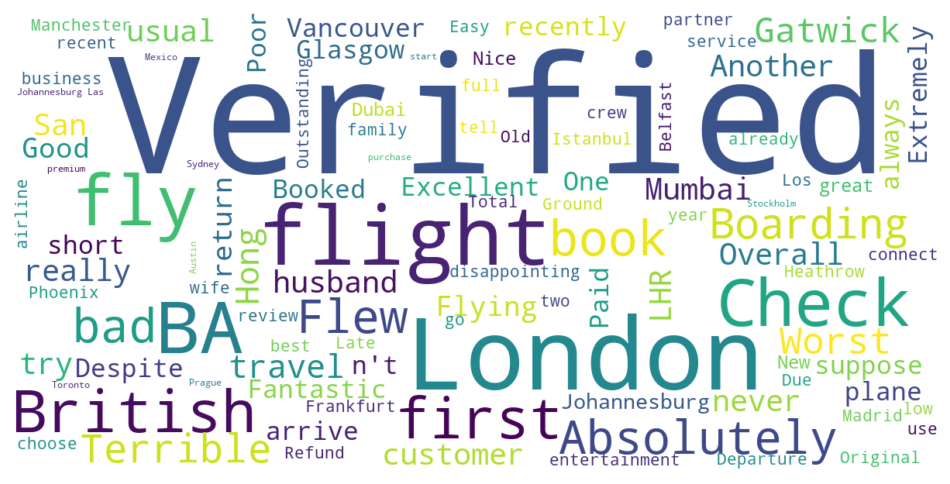

In [40]:
# Now import it
from wordcloud import WordCloud, STOPWORDS

# The function which will proceed it
def show_wordcloud(data):
    # Convert the data to a single string
    text_data = ' '.join(data.dropna().astype(str))
    
    # Create a set of stopwords
    custom_stopwords = set(STOPWORDS)

    # Generate the word cloud
    wordcloud = WordCloud(
        background_color='white',
        stopwords=custom_stopwords,
        max_words=200,
        max_font_size=70,
        scale=3,
        random_state=1
    ).generate(text_data)

    # Display the word cloud
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

# Example usage:
# Assuming df is your DataFrame and 'Lemma' is the column with text data
show_wordcloud(df['Lemma'])


# Thank you :) 